### We read in the data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


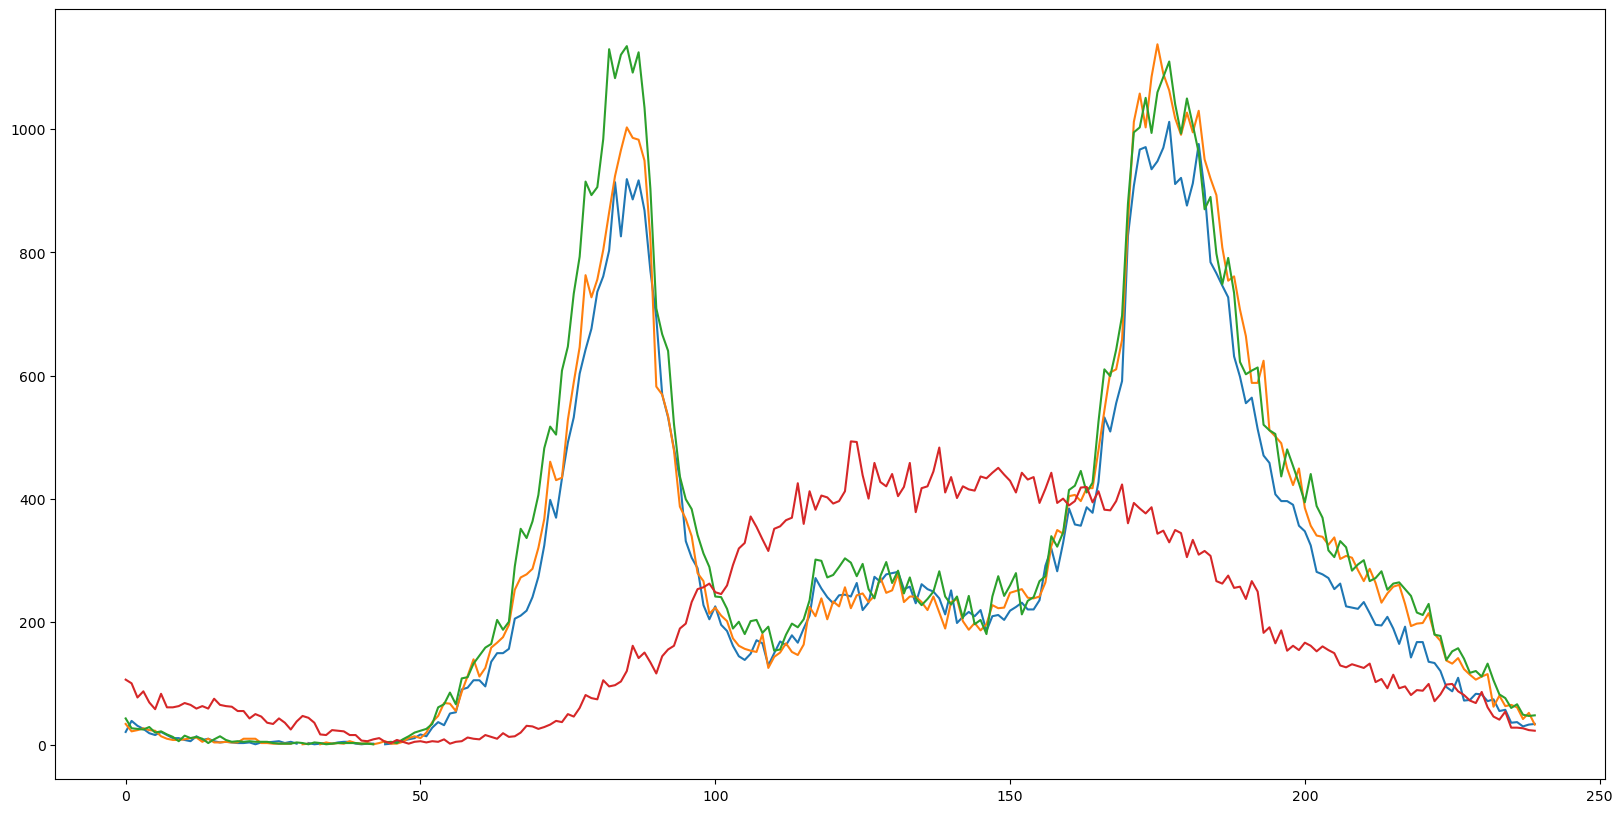

In [2]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])
plt.plot(day_hour_count.index, day_hour_count["sunday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [3]:
#Create each dataframe
monday = day_hour_count[["hour","monday"]].copy()
tuesday = day_hour_count[["hour","tuesday"]].copy()
saturday = day_hour_count[["hour","saturday"]].copy()
sunday = day_hour_count[["hour","sunday"]].copy()

In [4]:
#drop the empty values
monday_d = monday.dropna(subset=["monday"])
tuesday_d = tuesday.dropna(subset=["tuesday"])
saturday_d = saturday.dropna(subset=["saturday"])
sunday_d = sunday.dropna(subset=["sunday"])

In [5]:
monday_d.shape, tuesday_d.shape, saturday_d.shape, sunday_d.shape

((238, 2), (238, 2), (240, 2), (240, 2))

In [6]:
#transform into numpy array to apply models
x_mon = monday_d[["hour"]].to_numpy()
y_mon = monday_d[["monday"]].to_numpy()
x_tue = tuesday_d[["hour"]].to_numpy()
y_tue = tuesday_d[["tuesday"]].to_numpy()
x_sat = saturday_d[["hour"]].to_numpy()
y_sat = saturday_d[["saturday"]].to_numpy()
x_sun = sunday_d[["hour"]].to_numpy()
y_sun = sunday_d[["sunday"]].to_numpy()


## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics

#transform x values
poly5 = PolynomialFeatures(degree=5)
poly15 = PolynomialFeatures(degree=15)
poly20 = PolynomialFeatures(degree=20)

x_mon_5 = poly5.fit_transform(x_mon)
x_mon_15 = poly15.fit_transform(x_mon)
x_mon_20 = poly20.fit_transform(x_mon)

x_mon_5.shape, x_mon_15.shape, x_mon_20.shape, y_mon.shape

((238, 6), (238, 16), (238, 21), (238, 1))

In [8]:
#fit each linear regression models
linear5_mon = linear_model.LinearRegression()
linear5_mon.fit(x_mon_5, y_mon)

linear15_mon = linear_model.LinearRegression()
linear15_mon.fit(x_mon_15, y_mon)

linear20_mon = linear_model.LinearRegression()
linear20_mon.fit(x_mon_20, y_mon)

LinearRegression()

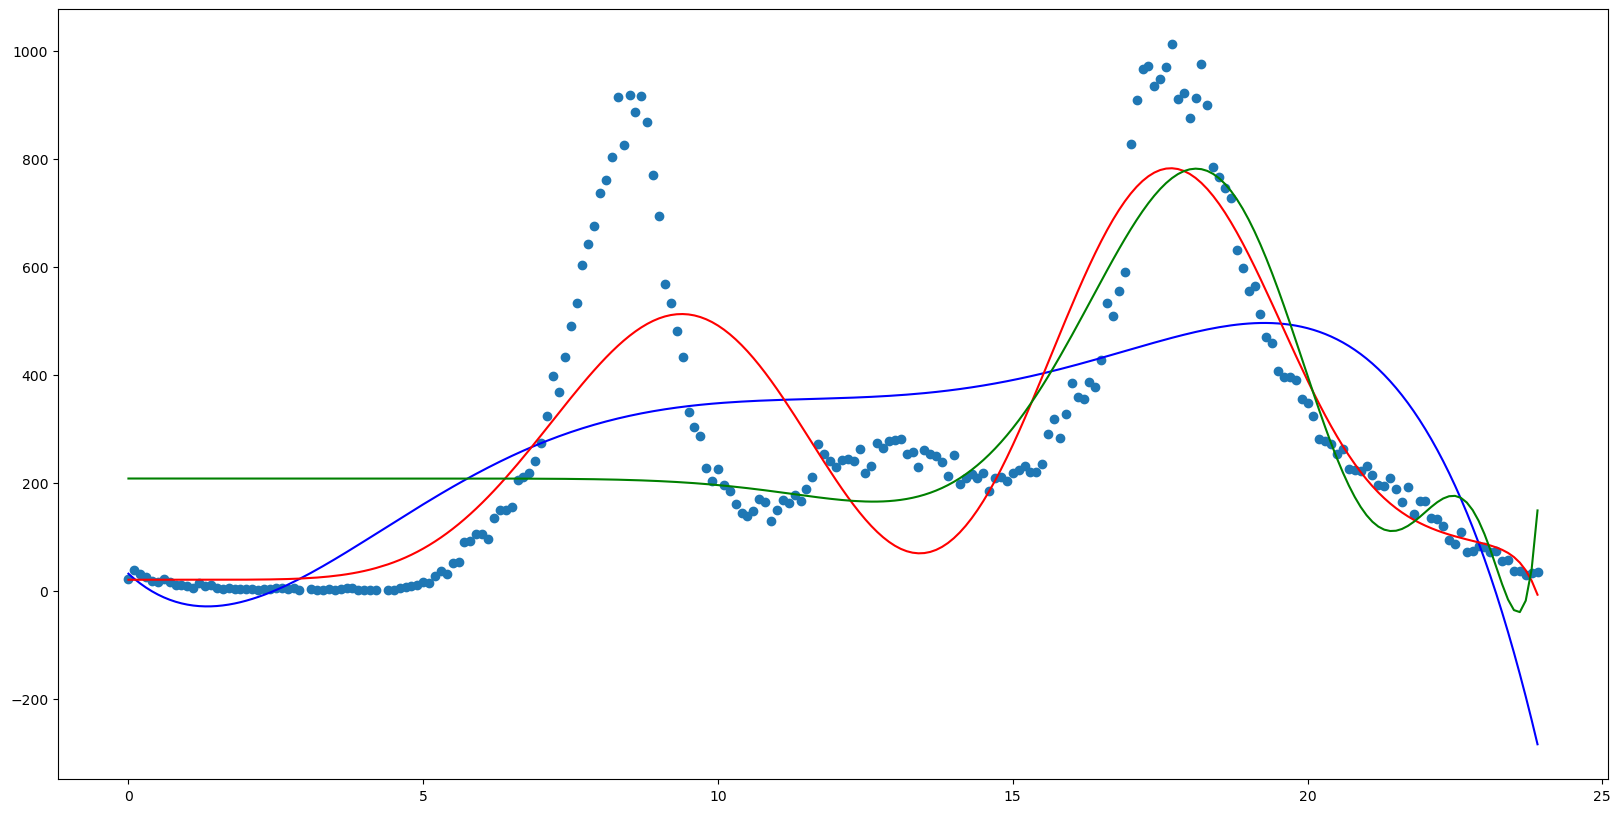

In [9]:
#plot each prediction values

plt.scatter(x_mon, y_mon)
plt.plot(x_mon, linear5_mon.predict(x_mon_5), c = 'b')
plt.plot(x_mon, linear15_mon.predict(x_mon_15), c = 'r')
plt.plot(x_mon, linear20_mon.predict(x_mon_20), c = 'g')

## 2b. Repeat `2a` for `saturday`

In [10]:
#transform x values

x_sat_5 = poly5.fit_transform(x_sat)
x_sat_15 = poly15.fit_transform(x_sat)
x_sat_20 = poly20.fit_transform(x_sat)

x_sat_5.shape, x_sat_15.shape, x_sat_20.shape, y_sat.shape

((240, 6), (240, 16), (240, 21), (240, 1))

In [11]:
#fit each linear regression models

linear5_sat = linear_model.LinearRegression()
linear5_sat.fit(x_sat_5, y_sat)

linear15_sat = linear_model.LinearRegression()
linear15_sat.fit(x_sat_15, y_sat)

linear20_sat = linear_model.LinearRegression()
linear20_sat.fit(x_sat_20, y_sat)

LinearRegression()

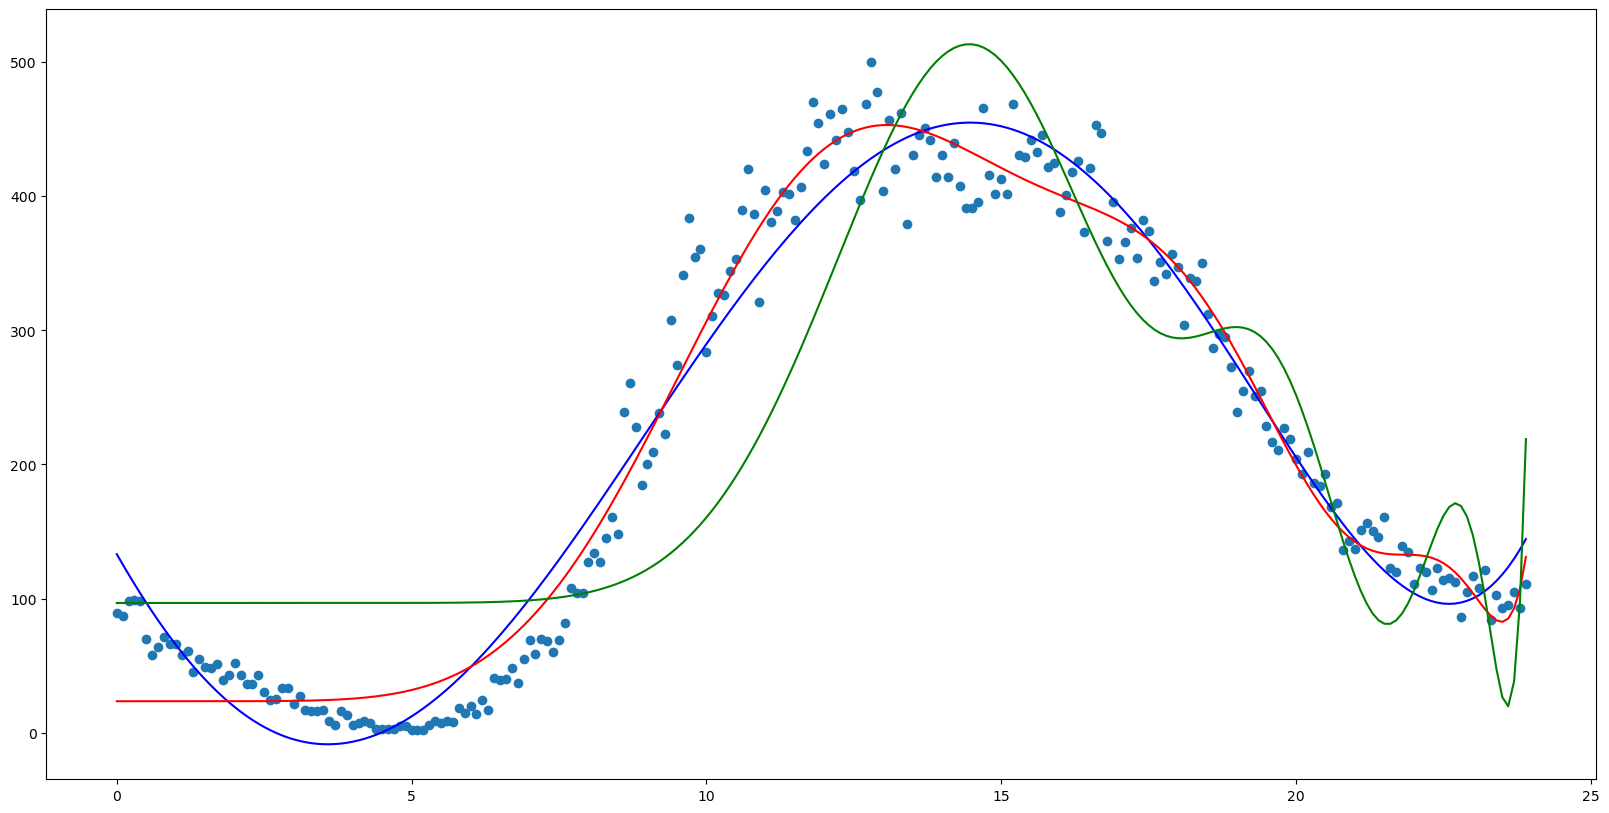

In [12]:
#plot each prediction values

plt.scatter(x_sat, y_sat)
plt.plot(x_sat, linear5_sat.predict(x_sat_5), c = 'b')
plt.plot(x_sat, linear15_sat.predict(x_sat_15), c = 'r')
plt.plot(x_sat, linear20_sat.predict(x_sat_20), c = 'g')

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


## 3-A. Monday/Tuesday

### Step 1. Which model fits best with monday? Answer: polynomial 15

In [13]:
#MSE : polynomial 15 has the least error
(
    metrics.mean_squared_error(y_mon, linear5_mon.predict(x_mon_5)),
    metrics.mean_squared_error(y_mon, linear15_mon.predict(x_mon_15)), 
    metrics.mean_squared_error(y_mon, linear20_mon.predict(x_mon_20))
)

(41987.445605897956, 19403.93577831465, 38378.3631392463)

In [14]:
#MAE : polynomial 15 has the least error
(
    metrics.mean_absolute_error(y_mon, linear5_mon.predict(x_mon_5)), 
    metrics.mean_absolute_error(y_mon, linear15_mon.predict(x_mon_15)),
    metrics.mean_absolute_error(y_mon, linear20_mon.predict(x_mon_20))
)

(156.18451811204645, 98.15910929541432, 141.9853297373431)

In [15]:
#MAPE : polynomial 15 has the least error
(
    metrics.mean_absolute_percentage_error(y_mon, linear5_mon.predict(x_mon_5)), 
    metrics.mean_absolute_percentage_error(y_mon, linear15_mon.predict(x_mon_15)),
    metrics.mean_absolute_percentage_error(y_mon, linear20_mon.predict(x_mon_20))
)

(3.959956065987383, 1.9413723475419873, 12.257657225600777)

### Step 2. compare errors of monday and tuesday dataset with monday prediction model
### Answer: MSE and MAE is lower in monday, but MAPE is lower in tuesday dataset

In [16]:
#MSE : error in monday data is lower
(
    metrics.mean_squared_error(y_mon, linear15_mon.predict(x_mon_15)),
    metrics.mean_squared_error(y_tue, linear15_mon.predict(x_mon_15)), 
)

(19403.93577831465, 23858.84583062077)

In [17]:
#MAE : error in monday data is lower
(
    metrics.mean_absolute_error(y_mon, linear15_mon.predict(x_mon_15)),
    metrics.mean_absolute_error(y_tue, linear15_mon.predict(x_mon_15)), 
)

(98.15910929541432, 105.85713546758706)

In [18]:
#MAPE : error in tuesday data is lower
(
    metrics.mean_absolute_percentage_error(y_mon, linear15_mon.predict(x_mon_15)),
    metrics.mean_absolute_percentage_error(y_tue, linear15_mon.predict(x_mon_15)), 
)

(1.9413723475419873, 1.8661090206732218)

## 3-B. Saturday/Sunday

### Step 1. Which model fits best with saturday? 
### Answer: Polynomial 15 for MSE and MAE, Polynomial 5 for MAPE


In [19]:
#MSE : polynomial 15 has the least error
(
    metrics.mean_squared_error(y_sat, linear5_sat.predict(x_sat_5)),
    metrics.mean_squared_error(y_sat, linear15_sat.predict(x_sat_15)), 
    metrics.mean_squared_error(y_sat, linear20_sat.predict(x_sat_20))
)

(995.2167048171038, 809.0490991282165, 6297.7973844756625)

In [20]:
#MAE : polynomial 15 has the least error
(
    metrics.mean_absolute_error(y_sat, linear5_sat.predict(x_sat_5)), 
    metrics.mean_absolute_error(y_sat, linear15_sat.predict(x_sat_15)),
    metrics.mean_absolute_error(y_sat, linear20_sat.predict(x_sat_20))
)

(25.347169800093255, 22.62367426115214, 65.02481417861516)

In [21]:
#MAPE : polynomial 5 has the least error
(
    metrics.mean_absolute_percentage_error(y_sat, linear5_sat.predict(x_sat_5)), 
    metrics.mean_absolute_percentage_error(y_sat, linear15_sat.predict(x_sat_15)),
    metrics.mean_absolute_percentage_error(y_sat, linear20_sat.predict(x_sat_20))
)

(0.46989867265320395, 0.7329310568307361, 2.4339160967795337)

### Step 2. errors of saturday and sunday dataset with monday prediction model
### Answer: in all cases, error in saturday is lower than sunday

In [22]:
#MSE: error in saturday is lower
(
    metrics.mean_squared_error(y_sat, linear15_sat.predict(x_sat_15)),
    metrics.mean_squared_error(y_sun, linear15_sat.predict(x_sat_15)), 
)

(809.0490991282165, 1638.7127680210274)

In [23]:
#MAE: error in saturday is lower
(
    metrics.mean_absolute_error(y_sat, linear15_sat.predict(x_sat_15)),
    metrics.mean_absolute_error(y_sun, linear15_sat.predict(x_sat_15)), 
)

(22.62367426115214, 34.6479059578238)

In [24]:
#MAPE: error in saturday is lower
(
    metrics.mean_absolute_percentage_error(y_sat, linear5_sat.predict(x_sat_5)),
    metrics.mean_absolute_percentage_error(y_sun, linear5_sat.predict(x_sat_5)), 
)

(0.46989867265320395, 0.7723154684747456)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

## 4-A. Saturday

In [25]:
from sklearn.model_selection import train_test_split

#use train/test split for saturday data
xtrain_sat, xtest_sat, ytrain_sat, ytest_sat = train_test_split(x_sat, y_sat)
linear_sat = linear_model.LinearRegression().fit(xtrain_sat, ytrain_sat)

#build polynomial models for train and test set(n = 5, 15, 20)
xtrain5_sat = PolynomialFeatures(degree=5).fit_transform(xtrain_sat)
xtest5_sat = PolynomialFeatures(degree=5).fit_transform(xtest_sat)

linear5_sat_train = linear_model.LinearRegression().fit(xtrain5_sat, ytrain_sat)

xtrain15_sat = PolynomialFeatures(degree=15).fit_transform(xtrain_sat)
xtest15_sat = PolynomialFeatures(degree=15).fit_transform(xtest_sat)

linear15_sat_train = linear_model.LinearRegression().fit(xtrain15_sat, ytrain_sat)

xtrain20_sat = PolynomialFeatures(degree=20).fit_transform(xtrain_sat)
xtest20_sat = PolynomialFeatures(degree=20).fit_transform(xtest_sat)

linear20_sat_train = linear_model.LinearRegression().fit(xtrain20_sat, ytrain_sat)

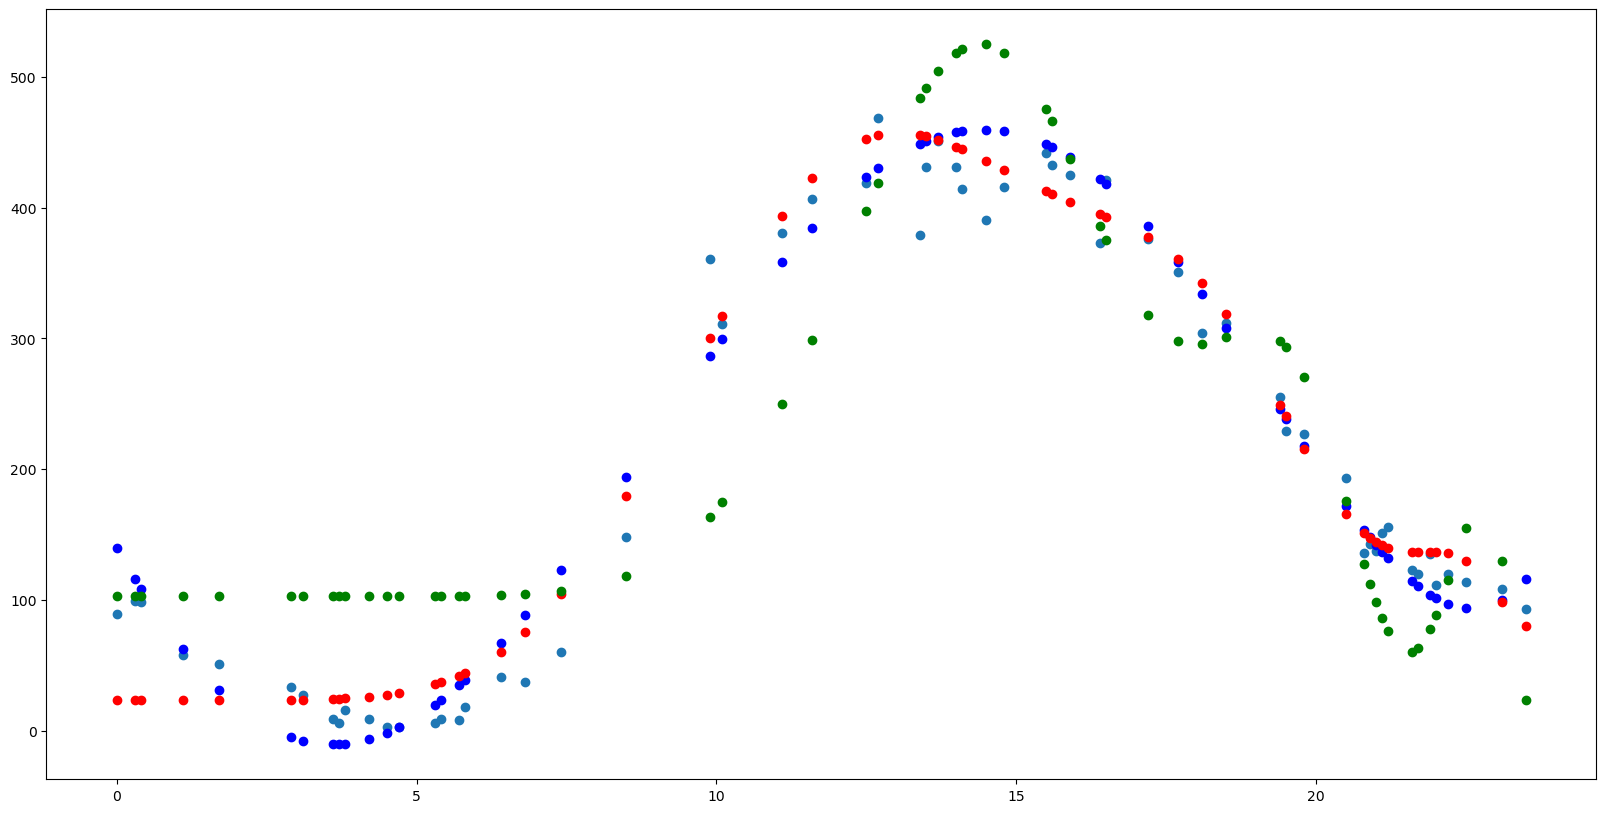

In [26]:
#Plot prediction values

plt.scatter(xtest_sat, ytest_sat)
plt.scatter(xtest_sat, linear5_sat_train.predict(xtest5_sat), c='b')
plt.scatter(xtest_sat, linear15_sat_train.predict(xtest15_sat), c='r')
plt.scatter(xtest_sat, linear20_sat_train.predict(xtest20_sat), c='g')

In [27]:
#MSE: Polynomial 15 has the least error
(
    metrics.mean_squared_error(ytest_sat, linear5_sat_train.predict(xtest5_sat)), 
    metrics.mean_squared_error(ytest_sat, linear15_sat_train.predict(xtest15_sat)),
    metrics.mean_squared_error(ytest_sat, linear20_sat_train.predict(xtest20_sat))
)

(828.3942364798181, 862.7715913191707, 5352.183505537066)

In [28]:
#MAE : polynomial 15 has the least error
(
    metrics.mean_absolute_error(ytest_sat, linear5_sat.predict(xtest5_sat)), 
    metrics.mean_absolute_error(ytest_sat, linear15_sat.predict(xtest15_sat)),
    metrics.mean_absolute_error(ytest_sat, linear20_sat.predict(xtest20_sat))
)

(21.347731605982265, 22.62669888873941, 56.62798776037457)

In [29]:
#MAPE : polynomial 5 has the least error
(
    metrics.mean_absolute_percentage_error(ytest_sat, linear5_sat.predict(xtest5_sat)), 
    metrics.mean_absolute_percentage_error(ytest_sat, linear15_sat.predict(xtest15_sat)),
    metrics.mean_absolute_percentage_error(ytest_sat, linear20_sat.predict(xtest20_sat))
)

(0.4644772958620213, 0.7818309914378647, 2.6764788634421683)

## 4-B. Monday

In [30]:
#use train/test split for monday data
xtrain_mon, xtest_mon, ytrain_mon, ytest_mon = train_test_split(x_mon, y_mon)
linear_mon = linear_model.LinearRegression().fit(xtrain_mon, ytrain_mon)

#build polynomial models for train and test set(n = 5, 15, 20)
xtrain5_mon = PolynomialFeatures(degree=5).fit_transform(xtrain_mon)
xtest5_mon = PolynomialFeatures(degree=5).fit_transform(xtest_mon)

linear5_mon_train = linear_model.LinearRegression().fit(xtrain5_mon, ytrain_mon)

xtrain15_mon = PolynomialFeatures(degree=15).fit_transform(xtrain_mon)
xtest15_mon = PolynomialFeatures(degree=15).fit_transform(xtest_mon)

linear15_mon_train = linear_model.LinearRegression().fit(xtrain15_mon, ytrain_mon)

xtrain20_mon = PolynomialFeatures(degree=20).fit_transform(xtrain_mon)
xtest20_mon = PolynomialFeatures(degree=20).fit_transform(xtest_mon)

linear20_mon_train = linear_model.LinearRegression().fit(xtrain20_mon, ytrain_mon)

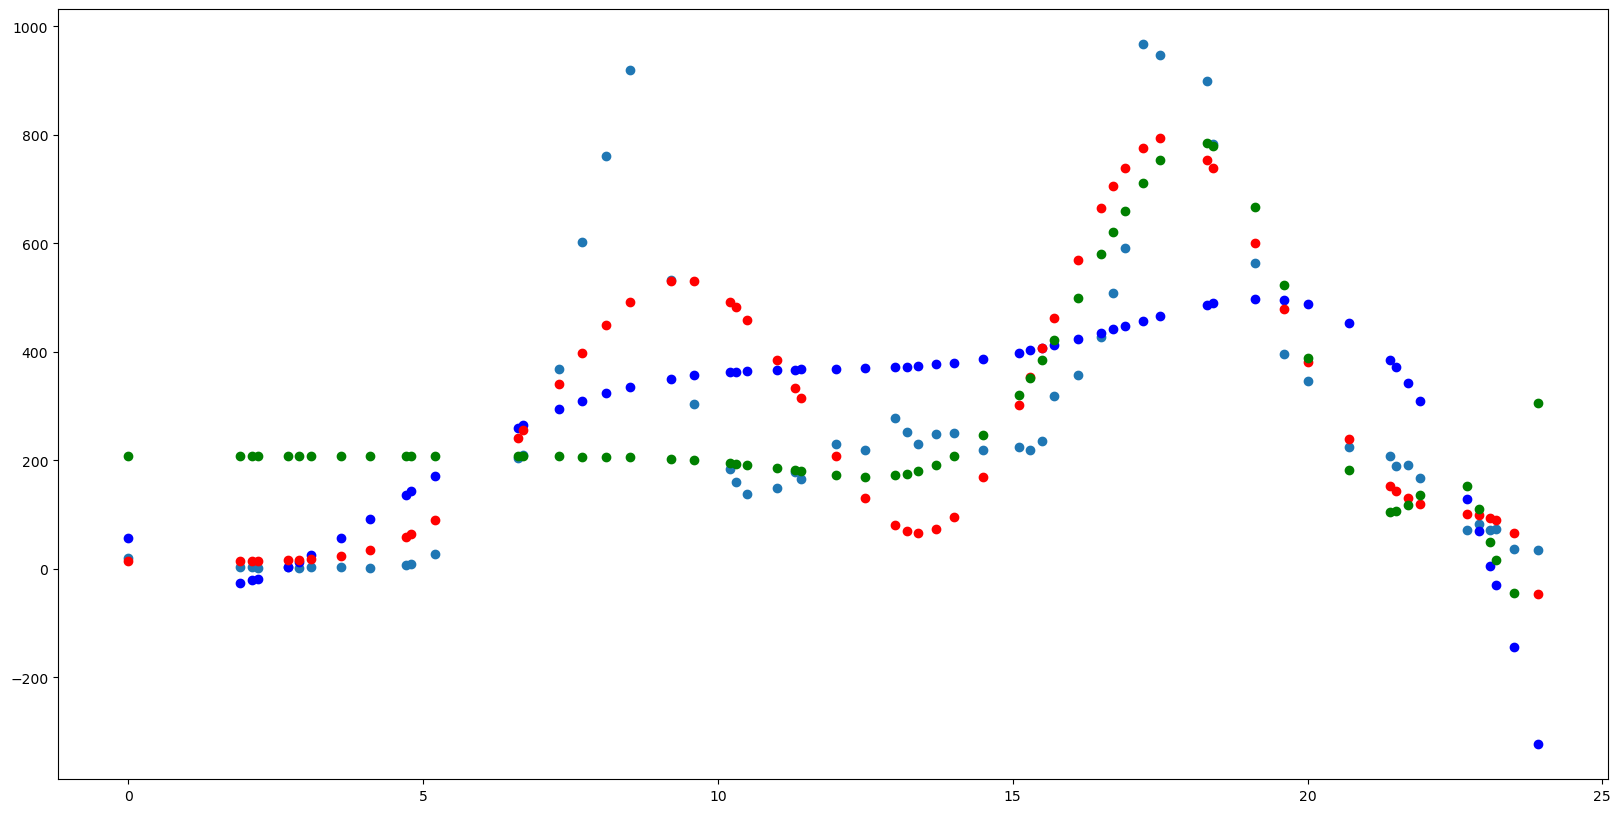

In [31]:
#Plot prediction values

plt.scatter(xtest_mon, ytest_mon)
plt.scatter(xtest_mon, linear5_mon_train.predict(xtest5_mon), c='b')
plt.scatter(xtest_mon, linear15_mon_train.predict(xtest15_mon), c='r')
plt.scatter(xtest_mon, linear20_mon_train.predict(xtest20_mon), c='g')

In [32]:
# MSE: polynomial 15 has the least error
(   
    metrics.mean_squared_error(ytest_mon, linear5_mon_train.predict(xtest5_mon)), 
    metrics.mean_squared_error(ytest_mon, linear15_mon_train.predict(xtest15_mon)),
    metrics.mean_squared_error(ytest_mon, linear20_mon_train.predict(xtest20_mon))
)

(39704.36537355736, 21769.81033890615, 33704.127256534244)

In [33]:
# MAE: polynomial 15 has the least error
(
    metrics.mean_absolute_error(ytest_mon, linear5_mon_train.predict(xtest5_mon)), 
    metrics.mean_absolute_error(ytest_mon, linear15_mon_train.predict(xtest15_mon)),
    metrics.mean_absolute_error(ytest_mon, linear20_mon_train.predict(xtest20_mon))
)

(154.70033168727866, 109.0528563260089, 132.75904566898893)

In [34]:
# MAPE: polynomial 15 has the least error
(
    metrics.mean_absolute_percentage_error(ytest_mon, linear5_mon_train.predict(xtest5_mon)), 
    metrics.mean_absolute_percentage_error(ytest_mon, linear15_mon_train.predict(xtest15_mon)),
    metrics.mean_absolute_percentage_error(ytest_mon, linear20_mon_train.predict(xtest20_mon))
)

(3.1785318035826577, 1.6972951809606711, 13.517158224190826)

## Conclusion: the result of linear regression using train/test set (Assignment 4) is similar with linear regression using the whole data (Assignment 3)